IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

CREATE RESULTS DIRECTORY

In [2]:
os.makedirs("results", exist_ok=True)

DATA GENERATION (SIMULATION)

In [3]:
np.random.seed(42)

num_samples = 1000

roll_numbers = np.random.randint(10000, 99999, num_samples)

study_hours = np.random.uniform(1, 10, num_samples)
attendance = np.random.uniform(50, 100, num_samples)
previous_score = np.random.uniform(40, 90, num_samples)

final_score = (
    5 * study_hours +
    0.3 * attendance +
    0.4 * previous_score +
    np.random.normal(0, 5, num_samples)
)

data = pd.DataFrame({
    "Roll_Number": roll_numbers,
    "Study_Hours": study_hours,
    "Attendance": attendance,
    "Previous_Score": previous_score,
    "Final_Score": final_score
})

data.head()


,Roll_Number,Study_Hours,Attendance,Previous_Score,Final_Score
0,25795,2.472903,80.760972,64.203853,56.797346
1,10860,2.478392,65.312681,77.372220,64.426613
2,86820,8.331172,81.194792,63.690491,91.214505
3,64886,6.986775,76.352073,42.892222,77.420779
4,16265,5.707589,71.304169,87.889490,76.839824


SAVE CSV

In [4]:
csv_path = "results/simulated_student_data.csv"
data.to_csv(csv_path, index=False)

print(f"CSV file saved at: {csv_path}")


CSV file saved at: results/simulated_student_data.csv


In [5]:
from sklearn.model_selection import train_test_split

X = data[["Study_Hours", "Attendance", "Previous_Score"]]
y = data["Final_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


TRAIN MULTIPLE ML MODELS

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse

results


{'Linear Regression': 28.617176965257975,
 'Decision Tree': 64.30828018457336,
 'Random Forest': 34.46913420305344,
 'KNN': 59.43036925993617,
 'SVR': 147.17839538533127}

RESULTS TABLE

In [7]:
results_df = pd.DataFrame(
    list(results.items()),
    columns=["Model", "Mean Squared Error"]
)

results_df


,Model,Mean Squared Error
0,Linear Regression,28.617177
1,Decision Tree,64.308280
2,Random Forest,34.469134
3,KNN,59.430369
4,SVR,147.178395


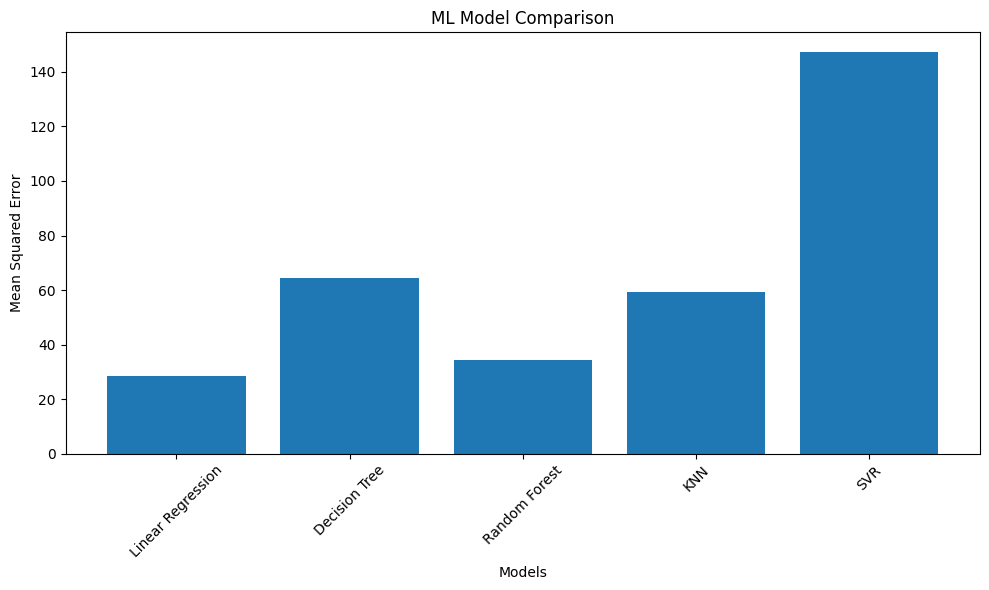

Graph saved at: results/model_comparison.png


In [8]:
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["Mean Squared Error"])
plt.xticks(rotation=45)
plt.title("ML Model Comparison")
plt.ylabel("Mean Squared Error")
plt.xlabel("Models")
plt.tight_layout()

graph_path = "results/model_comparison.png"
plt.savefig(graph_path)
plt.show()

print(f"Graph saved at: {graph_path}")


BEST MODEL

In [9]:
best_model = results_df.loc[
    results_df["Mean Squared Error"].idxmin()
]

best_model


Model                 Linear Regression
Mean Squared Error            28.617177
Name: 0, dtype: object

In [1]:
import os
os.getcwd()


'C:\\Users\\harse'